In [3]:
using JLD2, FileIO
using Plots

data_loc = "simulation_results.jld2"

N_vals = 10:10:80
σ_vals = [0.000, 0.001, 0.002]

3-element Vector{Float64}:
 0.0
 0.001
 0.002

# Von-Neumann Entropy

Check what we observe. Do we see the Von-Neumann entropy changing with disorder?
We expect VNE to scale logarithmically with system size for these systems, but does adding disorder meaningfully change this?

┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588


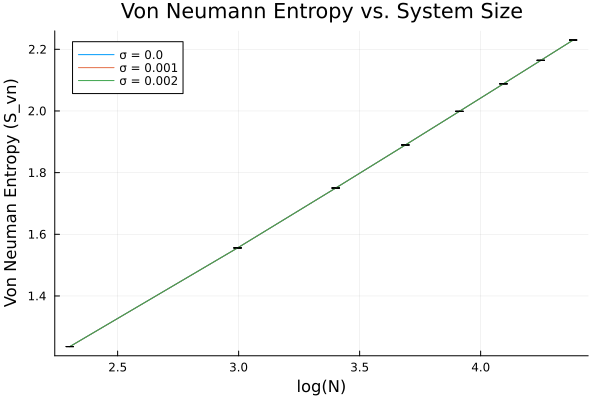

In [4]:
function plot_entropy_vs_logN(N_vals, σ_vals, data_loc)
    gr()
    entropy_plot = plot(
        title = "Von Neumann Entropy vs. System Size",
        xlabel = "log(N)",
        ylabel = "Von Neuman Entropy (S_vn)",
        legend = :topleft
    )

    # open the jld2 file
    jldopen(data_loc, "r") do file
       for σ in σ_vals
            #* collect data
            plot_log_N = Float64[]
            plot_S_vn = Float64[]
            plot_S_err = Float64[]
            
            for N in N_vals
                group_path = "N=$(N)/sigma=$(σ)"
                if haskey(file, group_path)
                    avg_ent = file[group_path]["avg_entropy"]
                    err_ent = file[group_path]["err_entropy"]
                    push!(plot_log_N, log(N))
                    push!(plot_S_vn, avg_ent)
                    push!(plot_S_err, err_ent)
                else
                    println("Warning: MISSING DATA for N=$N, σ=$σ !")
                end
            end

            if !isempty(plot_log_N)
                plot!(
                    entropy_plot,
                    plot_log_N,
                    plot_S_vn,
                    yerror = plot_S_err,
                    label = "σ = $σ",
                    marker_size=4,
                    capstyle = :round
                )
            else
                println("No data found for σ=$σ.")
            end
        end
    end
    display(entropy_plot)
end

plot_entropy_vs_logN(N_vals, σ_vals, data_loc)

Clearly not. The disorder does not meaningfully change the VNE of the system, despite the massive change to bond dimension we saw - which is strange. They are fundamentally measures of entanglement - however, they measure them in different ways. 

┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588


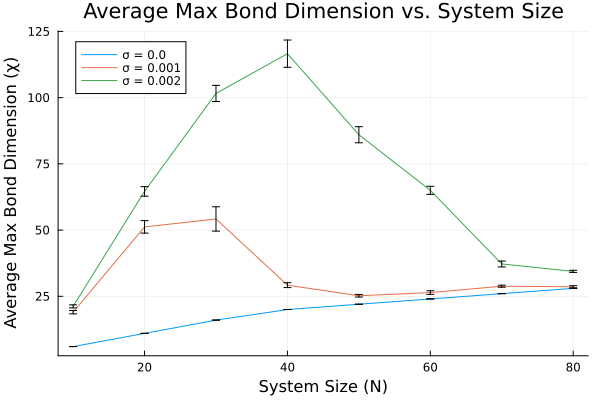

In [5]:
function plot_bond_dim_vs_N(N_vals, σ_vals, data_loc)
    
    gr() 
    bond_dim_plot = plot(
        title = "Average Max Bond Dimension vs. System Size",
        xlabel = "System Size (N)",
        ylabel = "Average Max Bond Dimension (χ)",
        legend = :topleft
    )
    
    if !isfile(data_loc)
        println("Error: Results file not found at '$data_loc'")
        println("Please run your 'get_data.jl' simulation script first.")
        return
    end
    

    jldopen(data_loc, "r") do file

        for σ in σ_vals
            plot_N = Float64[]
            plot_chi = Float64[]
            plot_chi_err = Float64[]
            
    
            for N in N_vals
                group_path = "N=$(N)/sigma=$(σ)"
                
        
                if haskey(file, group_path)
        
                    avg_chi = file[group_path]["avg_bond_dim"]
                    err_chi = file[group_path]["err_bond_dim"]
                    
          
                    push!(plot_N, N) 
                    push!(plot_chi, avg_chi)
                    push!(plot_chi_err, err_chi)
                else
                    println("Warning: Missing data for N=$N, σ=$σ. Skipping this point.")
                end
            end
            

            if !isempty(plot_N)
                plot!(
                    bond_dim_plot,
                    plot_N, 
                    plot_chi,
                    yerror = plot_chi_err, 
                    label = "σ = $σ",
                    markersize = 4,
                    capstyle = :round 
                )
            else
                println("No data found for σ = $σ.")
            end
        end
    end
    
    display(bond_dim_plot)

    # savefig(bond_dim_plot, "bond_dim_vs_N.png")
    # println("Plot saved to bond_dim_vs_N.png")
end

# --- Run the function ---
plot_bond_dim_vs_N(N_vals, σ_vals, data_loc)

## Entanglement Spectrum

Let's have a look at the spectrum of the entanglement - this is the Schmidt coefficients of the ground state MPS.

### What do we expect to see

We expect that the noise from the disorder will create some chaos in these systems, and cause the number of Schmidt coefficients required to represent the state to increase - this is why we see a larger bond dimension.

┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8

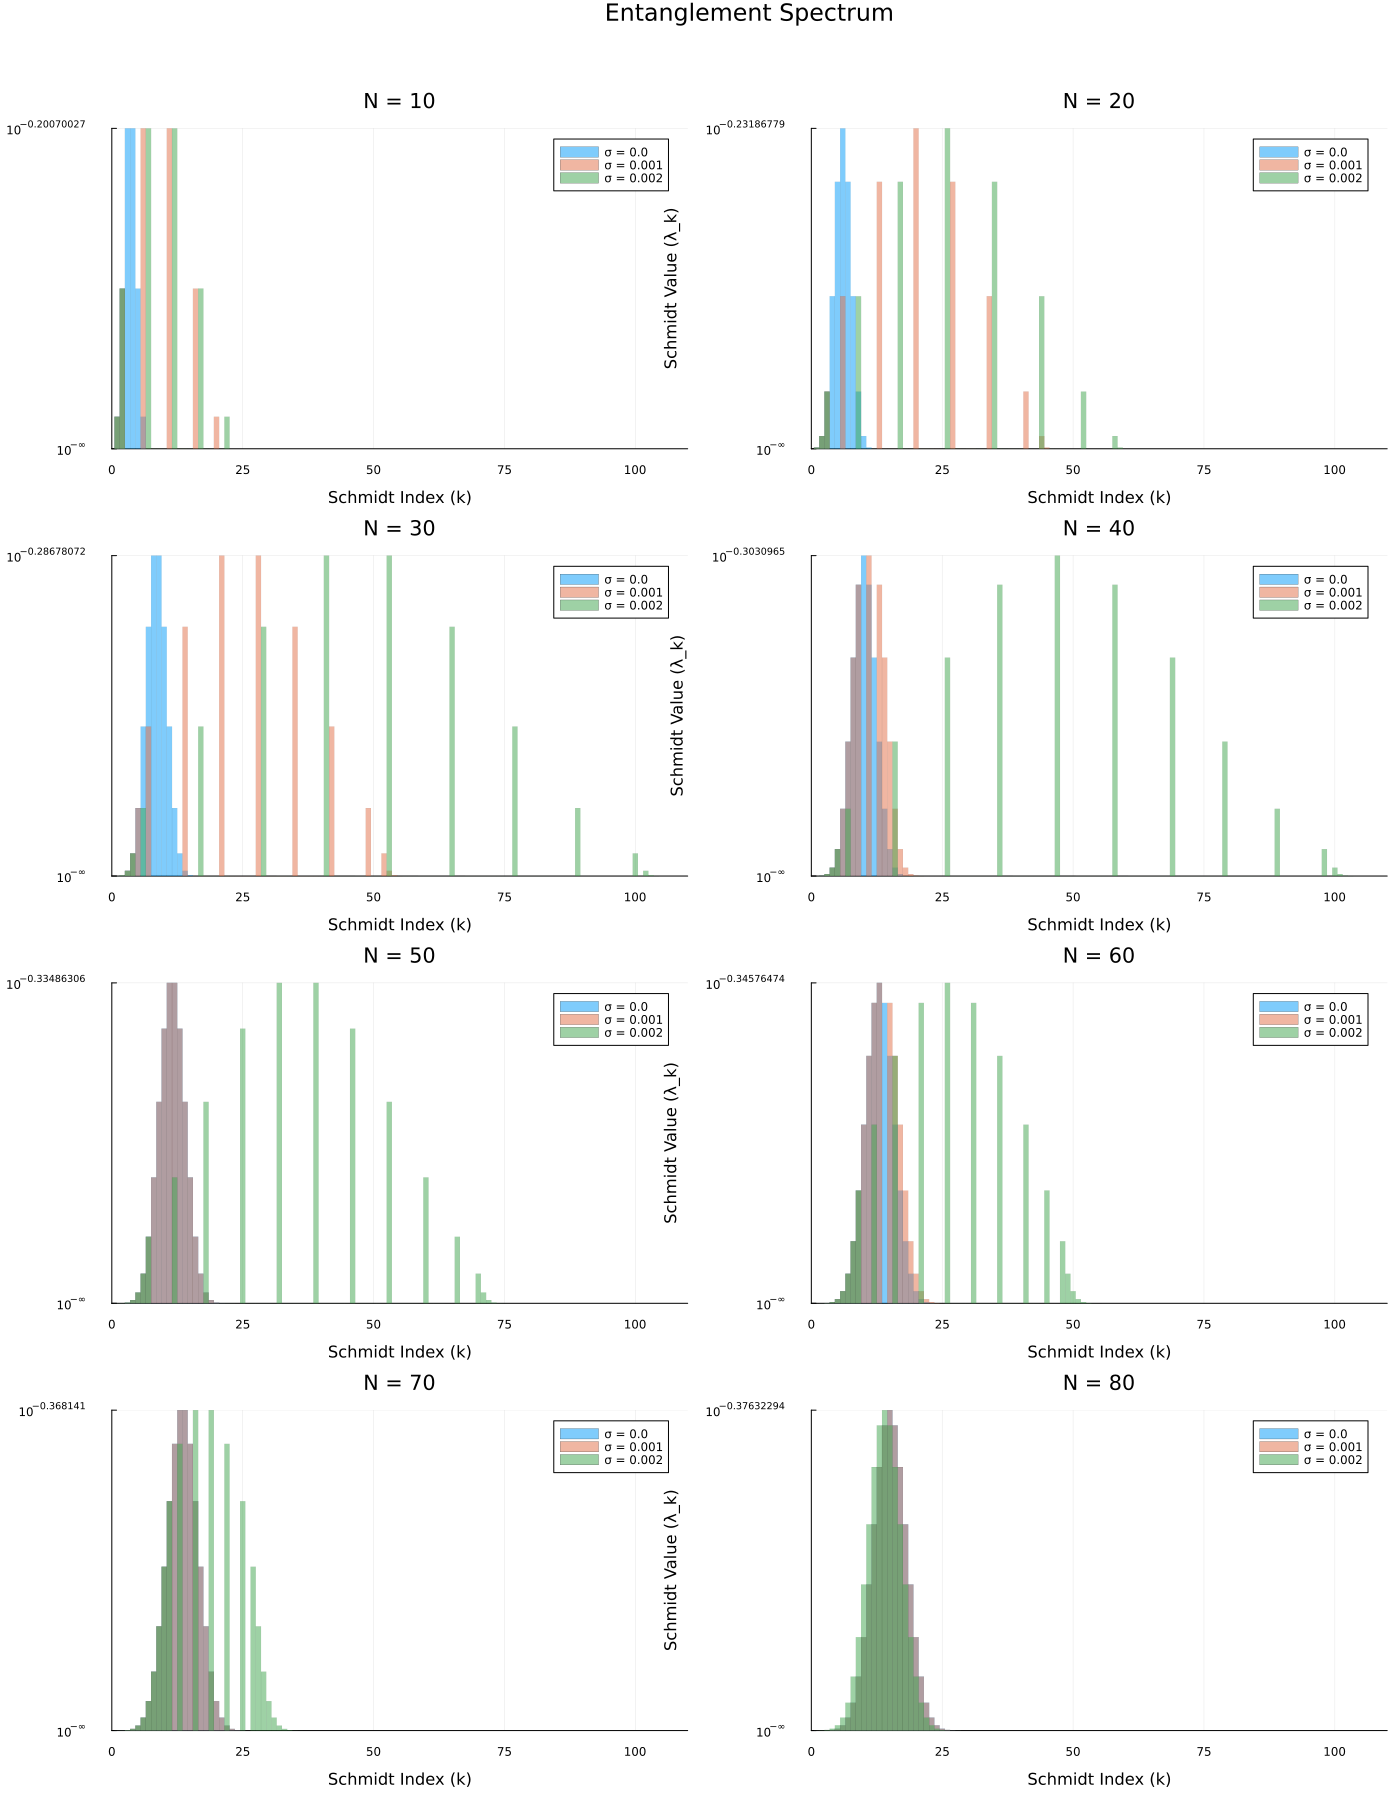

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict

Plot saved to entanglement_spectrum_bars_overlaid.png


┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict

In [6]:
function plot_entanglement_spectrum(N_vals, σ_vals, data_loc)
    
    if !isfile(data_loc)
        println("Error: Results file not found at '$data_loc'")
        println("Please run your 'get_data.jl' simulation script first.")
        return
    end


    gr()
    plot_list = []
    jldopen(data_loc, "r") do file
        for N in N_vals
      
            subplot = plot(
                title = "N = $N",
                xlabel = "Schmidt Index (k)",
                ylabel = "Schmidt Value (λ_k)",
                yscale = :log10,
                legend = :topright,
                yaxis = (formatter = :scientific),
                xlim = (0, 110)
            )
 
            for σ in σ_vals
                
                group_path = "N=$(N)/sigma=$(σ)"
                
                if haskey(file, group_path)
              
                    all_run_coefs = file[group_path]["schmidt_coefs"]
                    first_run = all_run_coefs[1]

                    if first_run isa Vector{Float64}
                        run_coefs = first_run
                    else
                   
                        run_coefs = first_run.storage.data
                    end
           
                    k_vals = 1:length(run_coefs)
                    
                    bar!(
                        subplot,
                        k_vals, 
                        run_coefs,
                        label = "σ = $σ",
                        bar_width = 1.0,    
                        alpha = 0.5,       
                        linewidth = 0,       
                    )
                else
                    println("Warning: Missing data for N=$N, σ=$σ. Skipping this.")
                end
            end # end sigma loop

            push!(plot_list, subplot)
            
        end # end N loop
    end # end jldopen

    final_grid_plot = plot(
        plot_list...,         
        layout = (4, 2),  
        size = (1400, 1800), 
        plot_title = "Entanglement Spectrum"
    )

    # Display the final plot
    display(final_grid_plot)
    
    savefig(final_grid_plot, "entanglement_spectrum_bars_overlaid.png")
    println("Plot saved to entanglement_spectrum_bars_overlaid.png")
end

plot_entanglement_spectrum(N_vals, σ_vals, data_loc)


## Current working theory 

So based on these results, we can start to put together an idea of what is happening. There are a few things to notice about this graph.

### Entanglement 'splitting' as a result of disorder

Firstly, the disorder seems to 'split' the state up into almost periodic patterns. Where, with $\sigma=0$ we have 'clumping' around some mean Schmidt coefficient (which we will now label $\lambda_{k}$), when we introduce disorder, we see a similar distribution, but with gaps. In fact, the distribution appears to be identical, again just split by these gaps.

Note that the value of the Schmidt coefficient is not zero in these gaps, otherwise they would not be included by the DMRG algorithm. More on this later.

### Scaling with $N$

We can also see a clear pattern which is related to the system size $N$. This scaling is dependent on $\sigma$, but the behaviour is similar for both, so we will just consider the $\sigma=0.002$ result for clarity.

#### Small $N$

For small $N$, from $N=10$ to $N=40$, the gap size is widening. This matches the fact that the bond dimension increases for this size. The distribution is being 'pushed out' to require more states to be represented.

#### Peak $N=40$

At around $N=40$ we are at the largest bond dimension and this corresponds to the largest maximum $k$ in the Schmidt coefficients.

#### Large $N$

We can see, for large $N$, the distribution begins to shrink back down into the $\sigma=0$ case, eventually settling on top of it (or probably would given enough time - can investigate this further). This again matches the theory about the bond dimension returning to its regular value.

### Von-Neuman entropy
It is beginning to make sense why the VNE doesn't change much when the bond dimension does. Calling the Schmidt coefficients that have large value the 'system' Schmidt coefficients, we can note that these are essentially constant, regardless of the amount of disorder, whereas the 'disorder' coefficients have very small values, and hence in the VNE formula, which weights contributions from Schmidt coefficients as 
$$
-\lambda_{k}\log( \lambda_{k} ) 
$$
these will contribute a tiny amount.

We will now show this graphically.



┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8

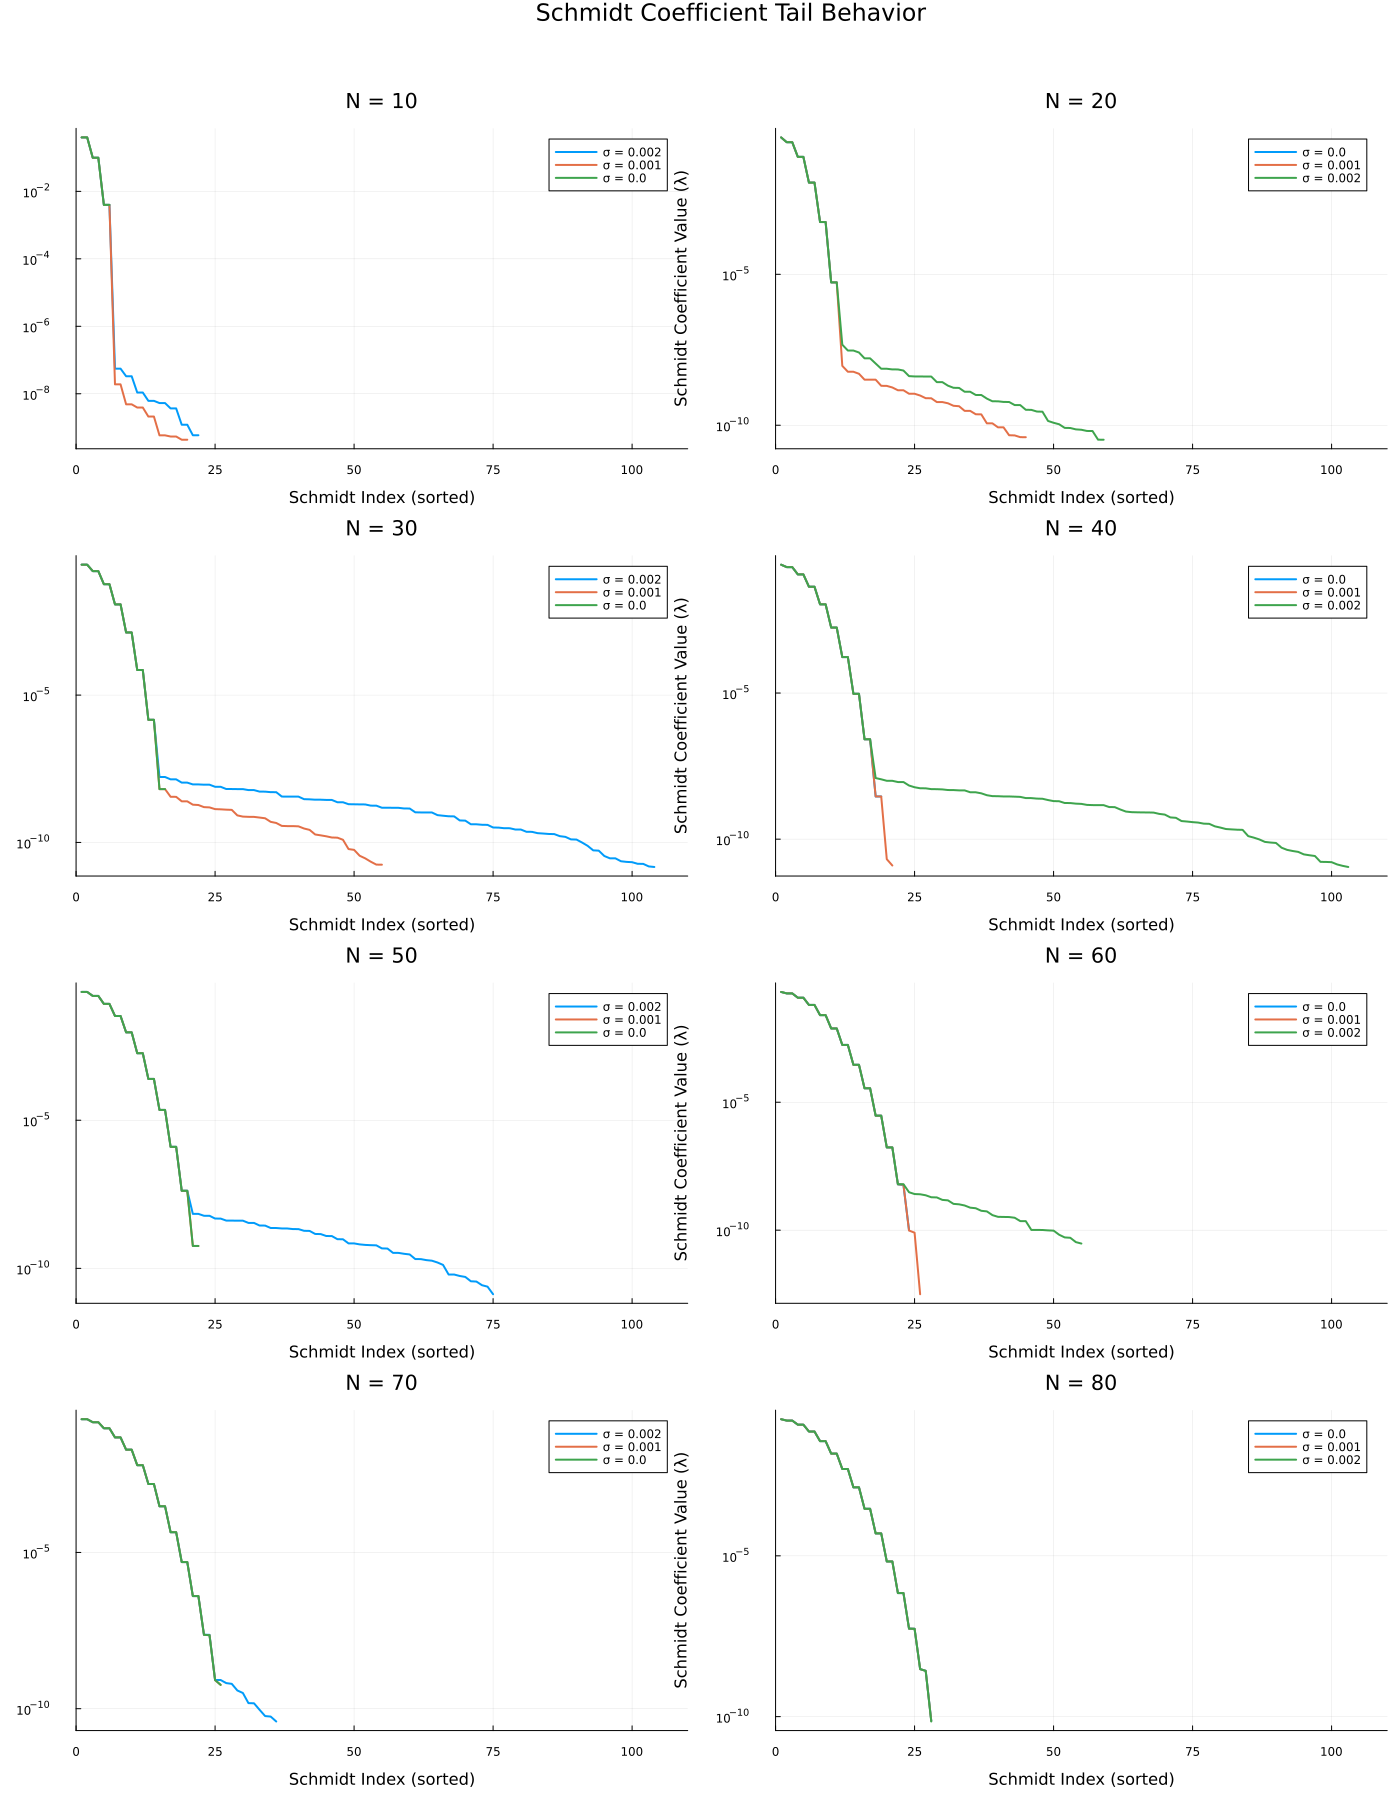

Plot saved to schmidt_coefficient_tails_first_run.png


In [7]:
function plot_schmidt_coefficient_tail_comparison_first_run(N_vals, σ_vals, data_loc)
    """
    Create plots showing Schmidt coefficients sorted by magnitude using the SAME data
    as the entropy contributions plot (first run only).
    """
    
    if !isfile(data_loc)
        println("Error: Results file not found at '$data_loc'")
        return
    end

    gr()
    plot_list = []
    
    jldopen(data_loc, "r") do file
        for N in N_vals
            subplot = plot(
                title = "N = $N",
                xlabel = "Schmidt Index (sorted)",
                ylabel = "Schmidt Coefficient Value (λ)",
                yscale = :log10,
                legend = :topright,
                yaxis = (formatter = :scientific),
                xlims = (0, 110)
            )
            
            for σ in reverse!(σ_vals)
                group_path = "N=$(N)/sigma=$(σ)"
                
                if haskey(file, group_path)
                    all_run_coefs = file[group_path]["schmidt_coefs"]
                    
                    first_run = all_run_coefs[1]
                    
                    if first_run isa Vector{Float64}
                        run_coefs = first_run
                    else
                        run_coefs = first_run.storage.data
                    end
                    
                    spectrum = run_coefs .^ 2
                    spectrum = spectrum[spectrum .> 1e-15]
                    spectrum ./= sum(spectrum)
                    
                    sorted_indices = sortperm(spectrum, rev=true)
                    sorted_spec = spectrum[sorted_indices]
                    
                    x_vals = 1:length(sorted_spec)
                    
                    plot!(
                        subplot,
                        x_vals,
                        sorted_spec,
                        label = "σ = $σ",
                        linewidth = 2
                    )
                else
                    println("Warning: Missing data for N=$N, σ=$σ")
                end
            end
            
            push!(plot_list, subplot)
        end
    end
    
    final_plot = plot(
        plot_list...,
        layout = (4, 2),
        size = (1400, 1800),
        plot_title = "Schmidt Coefficient Tail Behavior"
    )
    
    display(final_plot)
    savefig(final_plot, "schmidt_coefficient_tails_first_run.png")
    println("Plot saved to schmidt_coefficient_tails_first_run.png")
end

plot_schmidt_coefficient_tail_comparison_first_run(N_vals, σ_vals, data_loc)

We can see here that for the larger values of the Schmidt indexes (when sorted), the graphs look identical. However, small 'disorder' coefficients arise when we increase $sigma$. This is where the bond dimension increases, as there are physically more coefficients, however they contribute very little to the VNE.

┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588


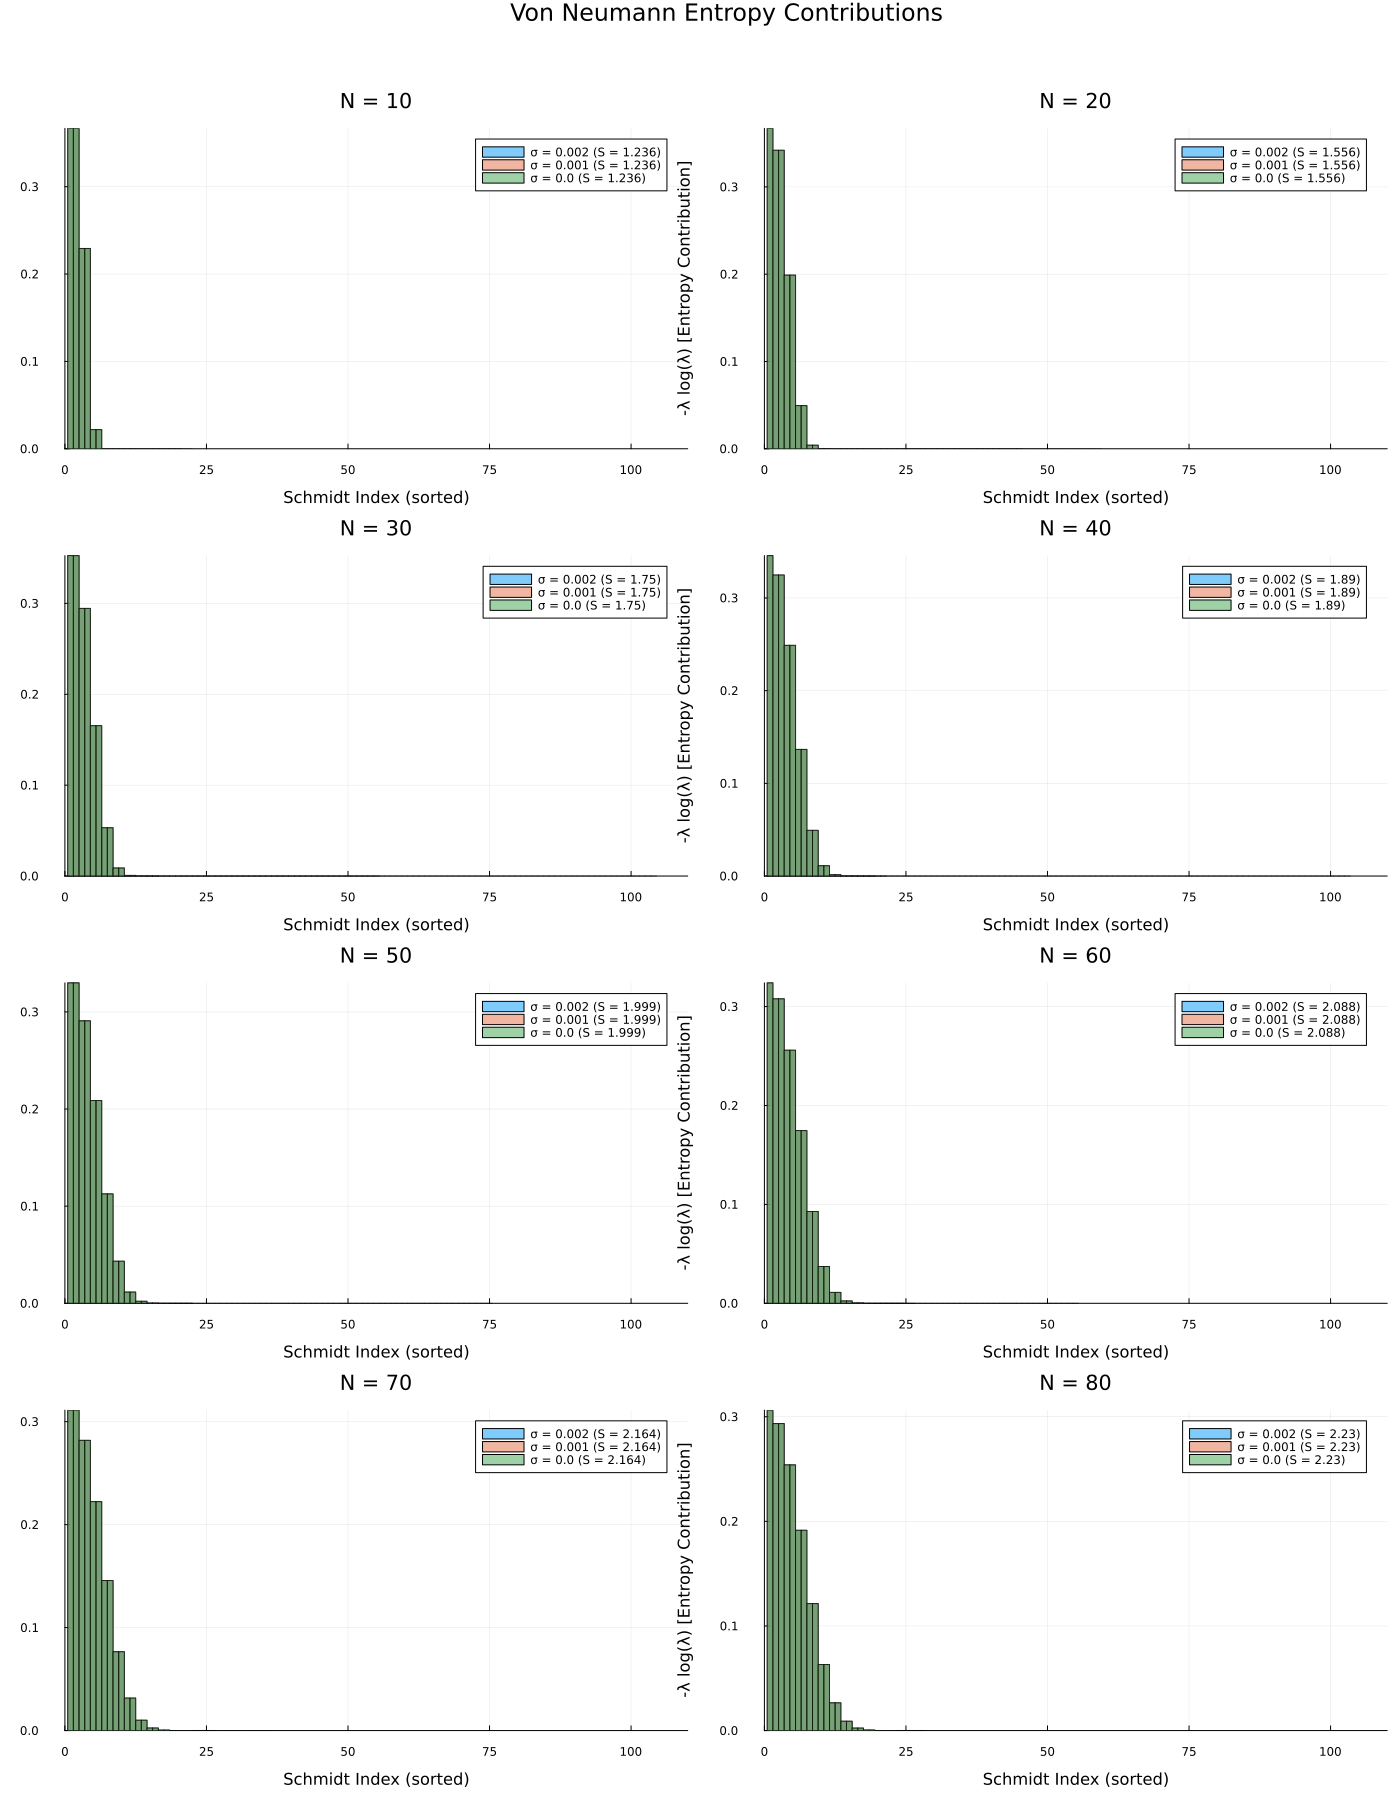

Plot saved to vn_entropy_contributions.png


In [8]:
function plot_vn_entropy_contributions(N_vals, σ_vals, data_loc; y_max=nothing)
    """
    Create plots showing the contribution to von Neumann entropy from each Schmidt coefficient.
    For each coefficient λ, plot -λ log(λ), and show the total entropy in the legend.
    
    Parameters:
    - y_max: Optional maximum y-axis value. If nothing, auto-scales.
    """
    
    if !isfile(data_loc)
        println("Error: Results file not found at '$data_loc'")
        return
    end

    gr()
    plot_list = []
    
    jldopen(data_loc, "r") do file
        for N in N_vals
            subplot = plot(
                title = "N = $N",
                xlabel = "Schmidt Index (sorted)",
                ylabel = "-λ log(λ) [Entropy Contribution]",
                legend = :topright,
                xlims = (0, 110),
                ylims = y_max === nothing ? :auto : (0, y_max)
            )
            
            for σ in reverse(σ_vals)
                group_path = "N=$(N)/sigma=$(σ)"
                
                if haskey(file, group_path)
                    
                    all_run_coefs = file[group_path]["schmidt_coefs"]
                    
                    first_run = all_run_coefs[1]
                    
                    if first_run isa Vector{Float64}
                        run_coefs = first_run
                    else
                        # It's a reconstructed ITensor, extract the data
                        run_coefs = first_run.storage.data
                    end
                    
                    spectrum = run_coefs .^ 2
                    spectrum = spectrum[spectrum .> 1e-15]
                    spectrum ./= sum(spectrum)
                    sorted_indices = sortperm(spectrum, rev=true)
                    sorted_spec = spectrum[sorted_indices]
                    entropy_contributions = -sorted_spec .* log.(sorted_spec)
                    
                    calculated_entropy = sum(entropy_contributions)
                    
                    x_vals = 1:length(sorted_spec)

                    label_text = "σ = $σ (S = $(round(calculated_entropy, digits=3)))"
                    
                    bar!(
                        subplot,
                        x_vals,
                        entropy_contributions,
                        label = label_text,
                        alpha = 0.5,
                        bar_width = 1.0
                    )
                else
                    println("Warning: Missing data for N=$N, σ=$σ")
                end
            end
            
            push!(plot_list, subplot)
        end
    end
    
    final_plot = plot(
        plot_list...,
        layout = (4, 2),
        size = (1400, 1800),
        plot_title = "Von Neumann Entropy Contributions"
    )
    
    display(final_plot)
    savefig(final_plot, "vn_entropy_contributions_ymax=$y_max.png")
    println("Plot saved to vn_entropy_contributions.png")
end

plot_vn_entropy_contributions(N_vals, σ_vals, data_loc)

┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588


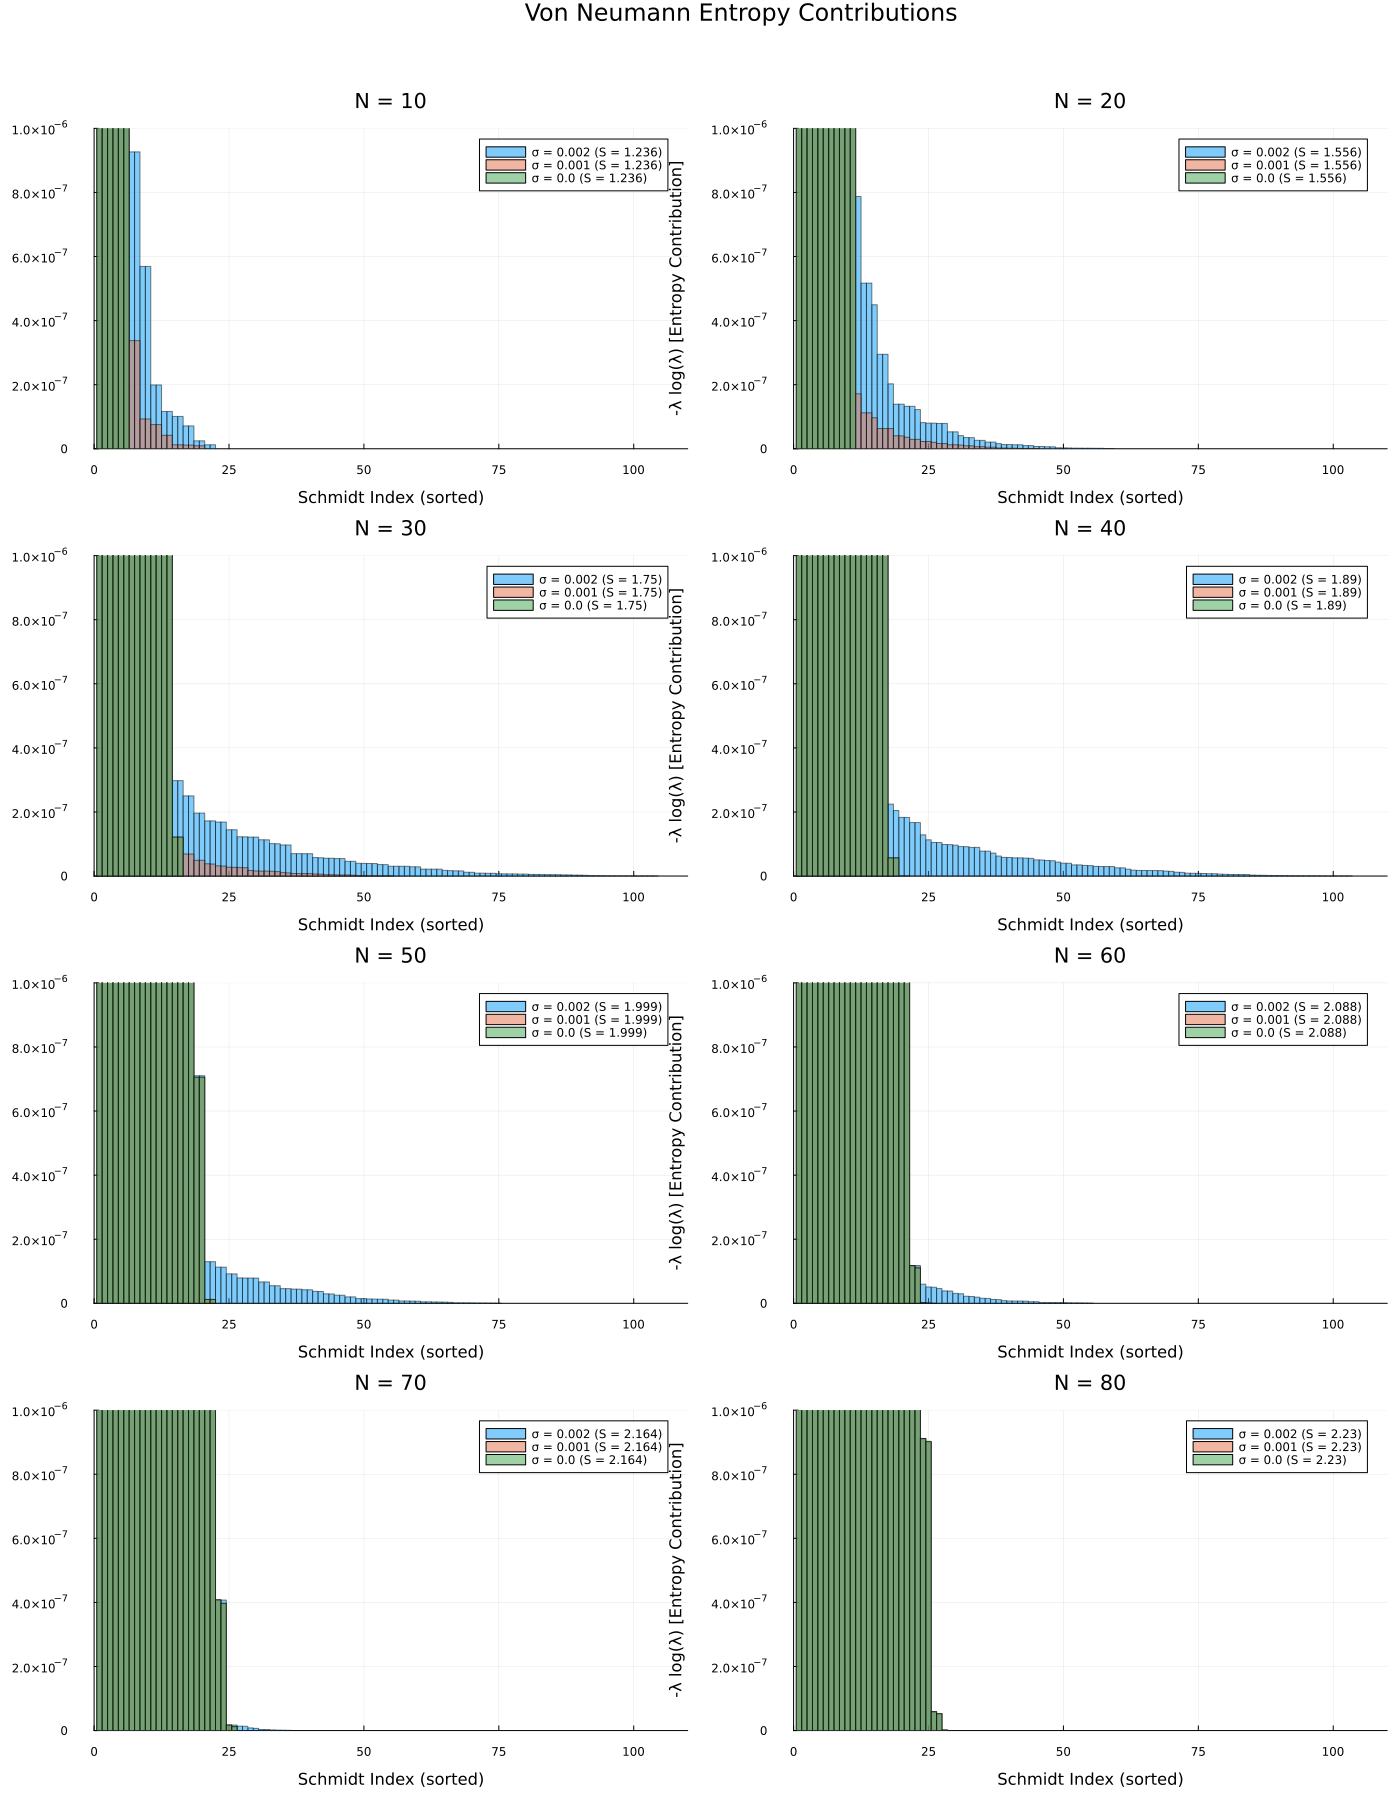

Plot saved to vn_entropy_contributions.png


In [9]:
plot_vn_entropy_contributions(N_vals, σ_vals, data_loc; y_max=0.000001)

This is even clearer when we plot the value of the Schmidt coefficients 'Von-Neumann contribution' $-\lambda_k \log \lambda_k$. Clearly, the massive bulk of the entropy comes from the large coeffcients, and we have to scale the graph way down to even see the contributions from the 'tails'.

## Plot just N=4

┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


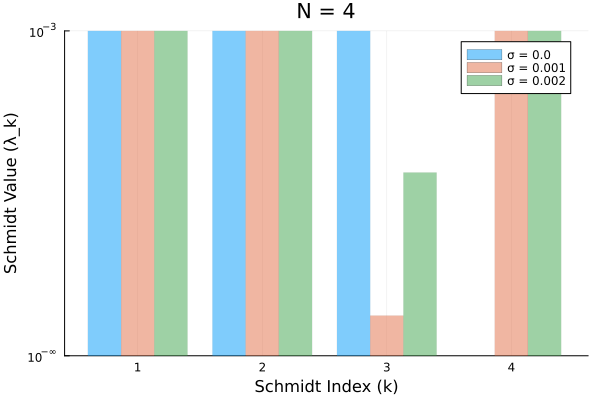

Plot saved to entanglement_spectrum_bars_N=4.png


┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [10]:
using Plots

function plot_entanglement_spectrum_single_N(N, σ_vals, data_loc)
    
    if !isfile(data_loc)
        println("Error: Results file not found at '$data_loc'")
        println("Please run your 'get_data.jl' simulation script first.")
        return
    end

    gr()
    
    # Create the plot outside the jldopen block
    plt = plot(
        title = "N = $N",
        xlabel = "Schmidt Index (k)",
        ylabel = "Schmidt Value (λ_k)",
        yscale = :log10,
        legend = :topright,
        yaxis = (formatter = :scientific),
        xticks = 0:1:25,
        ylim=(0, 1e-3)
    )
    
    jldopen(data_loc, "r") do file

        n_sigma = length(σ_vals)
        barwidth = 0.8 / n_sigma

        for (idx, σ) in enumerate(σ_vals)
            
            group_path = "N=$(N)/sigma=$(σ)"
            
            if haskey(file, group_path)
            
                all_run_coefs = file[group_path]["schmidt_coefs"]
                first_run = all_run_coefs[1]

                if first_run isa Vector{Float64}
                    run_coefs = first_run
                else
                    run_coefs = first_run.storage.data
                end

                offset = (idx - (n_sigma + 1) / 2) * barwidth
        
                k_vals = collect(1:length(run_coefs)) .+ offset
                
                bar!(
                    plt,
                    k_vals, 
                    run_coefs,
                    label = "σ = $σ",
                    bar_width = barwidth,    
                    alpha = 0.5,       
                    linewidth = 0,       
                )
            else
                println("Warning: Missing data for N=$N, σ=$σ. Skipping this.")
            end
        end # end sigma loop


    end # end jldopen



    # Display the final plot
    display(plt)
    
    savefig(plt, "entanglement_spectrum_bars_N=$N.png")
    println("Plot saved to entanglement_spectrum_bars_N=$N.png")
end

plot_entanglement_spectrum_single_N(4, σ_vals, data_loc)